## Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
#For plotting histogram
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize = (20,15))

## Train Test Splitting

In [9]:
# for learning purpose
import numpy as np
def split_train_set(data, test_ratio):
    np.random.seed(42) #to get fixed output whenever program runs
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_set_indices = shuffled[:test_set_size]
    train_set_indices = shuffled[test_set_size:]
    return data.iloc[train_set_indices],data.iloc[test_set_indices]

In [10]:
#train_set,test_set=split_train_set(housing,0.2)

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set {len(train_set)}\n Rows in test set {len(test_set)}")

Rows in train set 404
 Rows in test set 102


In [12]:
# All type of data of a col should be provided to train set so that it is trained properly. for that use stratified shuffle splitting
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

## Correlation matrices

In [15]:
# will find pearson coefficient for attributes to understand what is the correlation between attributes
corr_matrix = housing.corr()

In [16]:
# wrt label MEDV how is its correlation with other attributes
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [17]:
# will plot scatter plots of this correlation to get more insights like which are the outliers
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

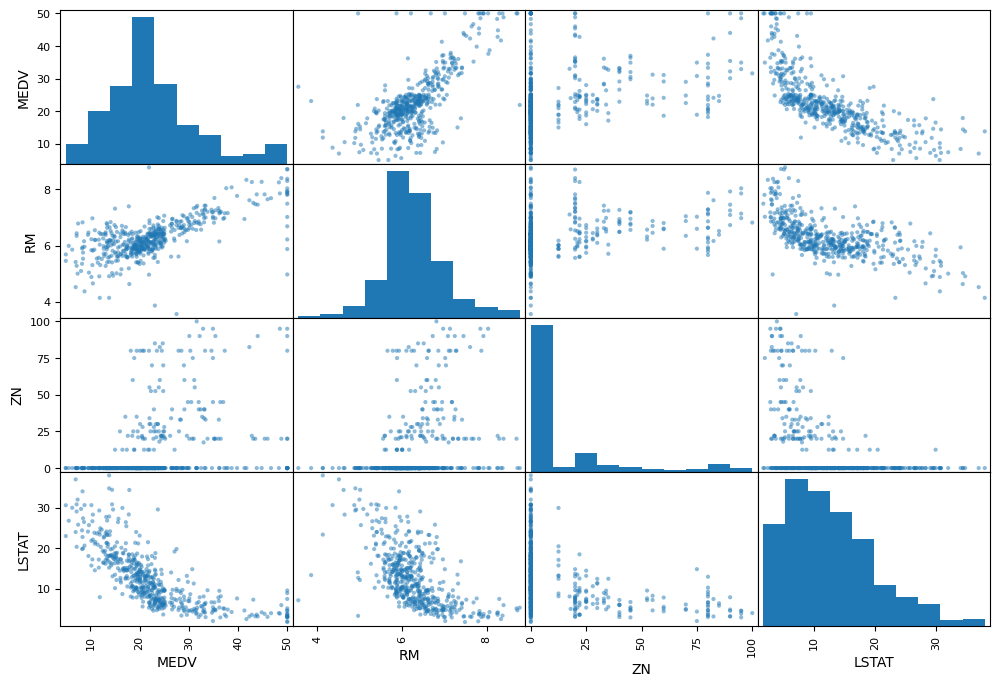

In [18]:
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [19]:
# ideally MEDV->MEDV plot should be straight line, bt scatter plot shows histogram instead of straight line for better insights

<Axes: xlabel='RM', ylabel='MEDV'>

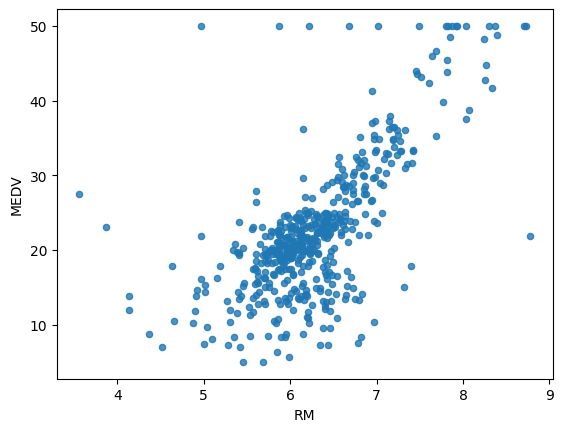

In [20]:
housing.plot(kind = "scatter",x="RM",y="MEDV", alpha=0.8)

In [21]:
# with increase in RM, proce should increase but not happening beyond 50 so such poitnts are outliers

## Trying Attribute combinations

In [22]:
# tax per room
housing["TAXRM"] = housing['TAX']/housing['RM']

In [23]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.906572
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.450491
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.497173
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.607897
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,98.201121
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


<Axes: xlabel='TAXRM', ylabel='MEDV'>

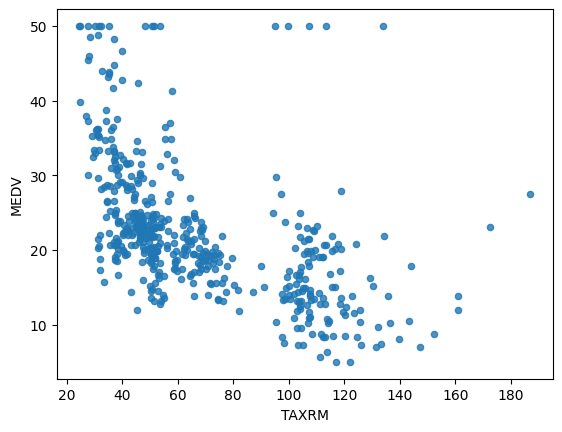

In [24]:
housing.plot(kind = "scatter",x="TAXRM",y="MEDV", alpha=0.8)  #negative correlation

In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.540380
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [26]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels =  strat_train_set["MEDV"].copy()

## Handling Missing Attributes

In [27]:
# option 1 , get rid of missing data points, original housing df will not be impacted
a= housing.dropna(subset=["RM"])
a.shape

(399, 13)

In [28]:
# option 2 , get rid of whole attribute, original housing df will not be impacted
housing.drop("RM", axis=1)


,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [29]:
# Option 3, set the value to some value (0, median, mode)
median = housing["RM"].median()

In [30]:
housing["RM"].fillna(median)
# original housing df will not be impacted

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
# another way using sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_
# calculates statustics for all cols

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [33]:
X=imputer.transform(housing)
# gives numpy array, have to convert to df

In [34]:
housing_transformed = pd.DataFrame(X, columns=housing.columns)

In [35]:
housing_transformed.describe() 
# RM now shows 506 pts

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## scikit-learn design

In [36]:
# Primarly, 3 types of objects
# 1. estimators -> estimates some params based on dataset ef Imputer
# fit -> fits the dataset and calculates internal params
# transform 
# 2. Transformers
# transform method takes input and returns output based on the learnings from fit method. It also has convinenince function called fit_transform() (this is better in performance)
# 3. Predictors
# Linear Regression model is an example. it also gives score method which will evaluate predictions

## Feature Scaling

In [37]:
# 1. Min max scaling (MinMaxScaler class of sklearn)
# 2. Standardization (StandardScaler)

## Create Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [39]:
housing_num_tr = my_pipeline.fit_transform(housing)

## Model Selection

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [41]:
some_data = housing.iloc[:5]

In [42]:
some_labels = housing_labels.iloc[:5]

In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([23.99866812, 27.25283558, 20.5818147 , 25.04908672, 23.77464206])

In [45]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [46]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [47]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

## Evalutaion of model

In [48]:
from sklearn.metrics import mean_squared_error
hosuing_predictions = model2.predict(housing_num_tr)
# hosuing_predictions = model1.predict(housing_num_tr)
# hosuing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,hosuing_predictions)
rmse = np.sqrt(mse)

In [49]:
rmse

np.float64(1.2127822831558153)

## Using better evaluation technique - Cross validation

In [50]:
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(model1, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [51]:
rmse_scores

array([4.09657799, 5.33012607, 5.01363993, 3.92614749, 4.17483533,
       2.93543012, 5.15465809, 3.7736587 , 3.3097583 , 4.58938994])

In [52]:
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores
# for linear regressor

array([4.22235612, 4.26438649, 5.09424333, 3.83081183, 5.37600331,
       4.41092152, 7.47272243, 5.48554135, 4.14606627, 6.0717752 ])

In [54]:
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(model2, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [55]:
rmse_scores

array([2.79934348, 2.80139541, 4.47370383, 2.59632657, 3.23390634,
       2.76777598, 4.50800552, 3.37966272, 2.9864752 , 3.06771437])

In [56]:
# both are performing well

In [57]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Std:",scores.std())

In [58]:
print_scores(rmse_scores)

Scores: [2.79934348 2.80139541 4.47370383 2.59632657 3.23390634 2.76777598
 4.50800552 3.37966272 2.9864752  3.06771437]
Mean: 3.2614309418284186
Std: 0.6528884589690042


In [ ]:
# RandomForest performing better than other 2 models

## Saving the model

In [59]:
from joblib import dump,load
dump(model2, 'FinalModel.joblib')

['FinalModel.joblib']

## Testing model on test data

In [63]:
X_test = strat_test_set.drop('MEDV', axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_prepared = my_pipeline.transform(X_test)
final_predictions= model2.predict(X_prepared)
final_mse=mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [62]:
final_rmse

np.float64(3.0127199651204366)